# Aubaine Auto 2024 Sales Analysis

## I. Goal
This python code analyzes data of used cars sold in 2024 in the car dealer Aubaine Auto to identify any patterns in sales. In other words, the goal is to identify, if there are, any ways to increase used cars sales for Aubaine Auto through investing in new sales channels, buying specific car models, focusing on older or newer models, etc. Below are the questions that the project answers.

* How much does a car spend in stock on average before being sold? (for KPI purposes)
* Which car brands/models does Aubaine auto buy and sell the most?
* Do older cars faster or slower than newer cars?
* Are there more successful sales channels than others? (for investment purposes)
* Are there months where cars sell much more than others? (for preparing inventory)
* Do cheaper cars sell faster or slower than more expensive cars?
* Do cars sell faster when they are discounted more?

## II. Data
The data contains 113 lines. Each line corresponds to a car that is eiher sold in 2024 or bought in 2024 and not sold yet.
There are 25 rows in the dataset.

### 1. Descriptive Data
* CAR
* BRAND
* MODEL_NAME
* MODEL_YEAR
* VIN (Vehicle Identification Number)
* PRICE_INITIAL
* PRICE_FINAL (Price at which the car was sold)

### 2. Sales Channels
* MARKETP.
* AUTO\nHEBDO
* CARGURUS
* DRIVE\nGOOD
* SALE_CHANNEL (Sales Channel through which the car was sold)

### 3. Timeline
* PURCH_DATE
* PURCH_DAY
* PURCH_MONTH
* PURCH_YEAR
* SALE_DATE
* SALE_DAY
* SALE_MONTH
* SALE_YEAR
* Days_Brand (Average number of days in stock for the brand of the car)
* Days_Model (Average number of days in stock for the model of the car)
* Days_Year_Make (Average number of days in stock for the year of make of the car)
* Days_Initial_Price (Average number of days in stock for the price of the car)

## III. Analysis

In [546]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [465]:
# PREPARE THE DATA

# Read the CSV file and turn it into a dataframe
df=pd.read_csv('Inventaire2024.csv')

# Remove unsold cars from dataframe
df = df[df['SALE_DATE'].notna()]

#Turn PURCH_DATE and SALE_DATE to datetime
df['PURCH_DATE'] = pd.to_datetime(df['PURCH_DATE'], format='%d-%m-%Y')
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], format='%d-%m-%Y')

#Fixing missng values in PURCH_YEAR
df['PURCH_YEAR'] = df['PURCH_DATE'].dt.year
df

,CAR,BRAND,MODEL_NAME,MODEL_YEAR,VIN,PURCH_DATE,PURCH_YEAR,PURCH_MONTH,PURCH_DAY,PRICE_INITIAL,...,SALE_DATE,DAYS_IN_STOCK,SALE_YEAR,SALE_MONTH,SALE_DAY,SALE_CHANNEL,Days_Brand,Days_Model,Days_Year_Make,Days_Initial_Price
0,2016 HONDA ODYSSEY,HONDA,ODYSSEY,2016,5FNRL5H2XGB505850,2023-11-28,2023,11,28,"$15,995.00",...,2024-01-16,49,2024.0,1.0,16.0,AUTO_HEBDO,133,26,123,189
1,2013 SUZUKI SX4,SUZUKI,SX4,2013,JS2YB5A72D6100079,2024-01-02,2024,1,2,"$7,495.00",...,2024-01-18,16,2024.0,1.0,18.0,MARKETPLACE,16,16,44,40
2,2011 HYUNDAI ACCENT,HYUNDAI,ACCENT,2011,KMHCN4BC6BU549559,2023-10-20,2023,10,20,"$6,495.00",...,2024-01-19,91,2024.0,1.0,19.0,AUTO_HEBDO,52,41,119,38
3,2011 MAZDA CX-7,MAZDA,CX-7,2011,JM3ER4C34B0354560,2023-10-27,2023,10,27,"$7,995.00",...,2024-01-20,85,2024.0,1.0,20.0,KHALIL,136,64,119,88
4,2016 JEEP PATRIOT,JEEP,PATRIOT,2016,1C4NJRAB5GD650548,2023-11-13,2023,11,13,"$13,995.00",...,2024-01-31,79,2024.0,1.0,31.0,AUTO_HEBDO,150,56,123,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2015 NISSAN MICRA,NISSAN,MICRA,2015,3N1CK3CPXFL267503,2024-10-31,2024,10,31,"$6,495.00",...,2024-11-19,19,2024.0,11.0,19.0,MARKETPLACE,177,19,98,38
75,2013 MAZDA5,MAZDA,5,2013,JM1CW2CL3D0157184,2024-11-13,2024,11,13,"$6,495.00",...,2024-11-18,5,2024.0,11.0,18.0,MARKETPLACE,136,5,44,38
76,2018 HYUNDAI SANTA FE,HYUNDAI,SANTA FE,2018,5XYZUDLB0JG516497,2024-10-22,2024,10,22,"$12,995.00",...,2024-11-23,32,2024.0,11.0,23.0,KHALIL,32,16,122,132
77,2016 HYUNDAI ELANTRA,HYUNDAI,ELANTRA GT,2016,KMHD35LH7GU297581,2024-11-22,2024,11,22,"$9,995.00",...,2024-11-23,1,2024.0,11.0,23.0,ALI,52,1,123,131


In [567]:
# Getting dataframe column names

list(df.columns)

['CAR',
 'BRAND',
 'MODEL_NAME',
 'MODEL_YEAR',
 'VIN',
 'PURCH_DATE',
 'PURCH_YEAR',
 'PURCH_MONTH',
 'PURCH_DAY',
 'PRICE_INITIAL',
 'MARKETP.',
 'AUTO\nHEBDO',
 'CARGURUS',
 'DRIVE\nGOOD',
 'PRICE_FINAL',
 'SALE_DATE',
 'DAYS_IN_STOCK',
 'SALE_YEAR',
 'SALE_MONTH',
 'SALE_DAY',
 'SALE_CHANNEL',
 'Days_Brand',
 'Days_Model',
 'Days_Year_Make',
 'Days_Initial_Price',
 'DISCOUNT_VALUE',
 'DISCOUNT_INDEX']

In [467]:
# Check for missing values
print(pd.isna(df))

      CAR  BRAND  MODEL_NAME  MODEL_YEAR    VIN  PURCH_DATE  PURCH_YEAR  \
0   False  False       False       False  False       False       False   
1   False  False       False       False  False       False       False   
2   False  False       False       False  False       False       False   
3   False  False       False       False  False       False       False   
4   False  False       False       False  False       False       False   
..    ...    ...         ...         ...    ...         ...         ...   
74  False  False       False       False  False       False       False   
75  False  False       False       False  False       False       False   
76  False  False       False       False  False       False       False   
77  False  False       False       False  False       False       False   
78  False  False       False       False  False       False       False   

    PURCH_MONTH  PURCH_DAY  PRICE_INITIAL  ...  SALE_DATE  DAYS_IN_STOCK  \
0         False      Fa

In [469]:
# Check the data types of the columns
print(df.dtypes)

CAR                           object
BRAND                         object
MODEL_NAME                    object
MODEL_YEAR                     int64
VIN                           object
PURCH_DATE            datetime64[ns]
PURCH_YEAR                     int32
PURCH_MONTH                    int64
PURCH_DAY                      int64
PRICE_INITIAL                 object
MARKETP.                      object
AUTO\nHEBDO                   object
CARGURUS                      object
DRIVE\nGOOD                   object
PRICE_FINAL                   object
SALE_DATE             datetime64[ns]
DAYS_IN_STOCK                  int64
SALE_YEAR                    float64
SALE_MONTH                   float64
SALE_DAY                     float64
SALE_CHANNEL                  object
Days_Brand                     int64
Days_Model                     int64
Days_Year_Make                 int64
Days_Initial_Price             int64
dtype: object


In [471]:
# Calculate the average days in stock
df.loc[:, 'DAYS_IN_STOCK'].mean()

93.79746835443038

In [473]:
# Top car brands
countbybrand=df.groupby('BRAND')['VIN'].count().nlargest(5)
print(countbybrand)

# Top car models
countbymodel=df.groupby('MODEL_NAME')['VIN'].count().nlargest(5)
print(countbymodel)

BRAND
HYUNDAI        11
MITSUBISHI     11
NISSAN         10
MAZDA           9
CHEVROLET       8
Name: VIN, dtype: int64
MODEL_NAME
RVR        6
3          5
ACCENT     4
CRUZE      3
ELANTRA    3
Name: VIN, dtype: int64


Axes(0.125,0.11;0.775x0.77)


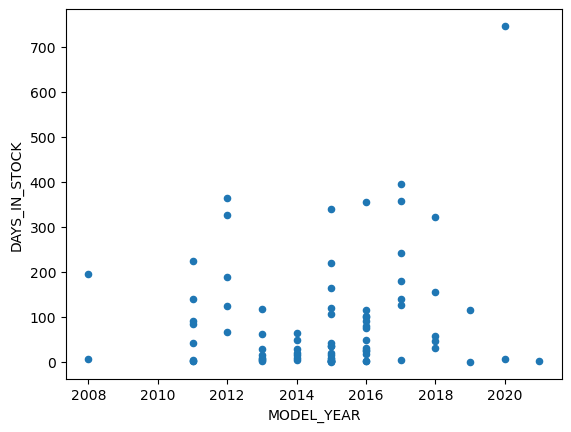

In [475]:
# Scatterplot of days in stock vs year of make
fig1=df.plot.scatter(x = 'MODEL_YEAR', y = 'DAYS_IN_STOCK')
print(fig1)

Text(0.5, 1.0, 'Days in Stock vs Year of Make')


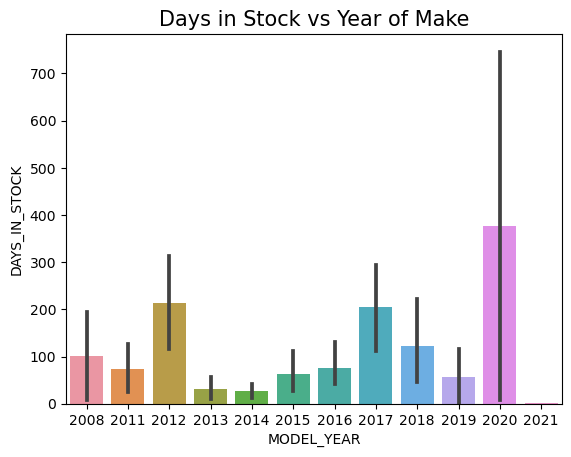

In [476]:
# A bar plot should be more appropriate since MODEL_YEAR is a categorical data
fig2=sns.barplot(data=df, x='MODEL_YEAR', y='DAYS_IN_STOCK').set_title('Days in Stock vs Year of Make', size=15)
print(fig2)

In [477]:
# Number of cars sold per month so far
countbymonth=df.groupby('SALE_MONTH')['VIN'].count().reset_index()
print(countbymonth)


    SALE_MONTH  VIN
0          1.0    6
1          2.0    7
2          3.0    5
3          4.0    9
4          5.0   10
5          6.0   11
6          7.0    4
7          8.0    7
8          9.0    4
9         10.0    5
10        11.0   11


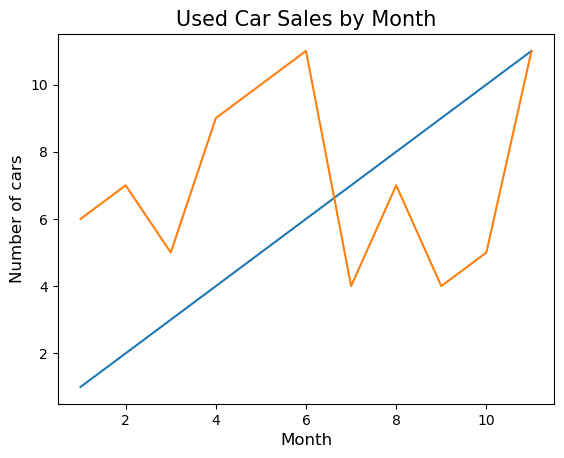

In [479]:
#Line chart of sales per month from January to December (Time Series)

# Create a line chart
plt.plot(countbymonth.SALE_MONTH, countbymonth.values)

#Title and labels
plt.title('Used Car Sales by Month', size=15)
plt.xlabel('Month', size=12)
plt.ylabel('Number of cars', size=12)

# Display the chart
plt.show()

In [480]:
# Count of days in stock by sales channel
df2=df.SALE_CHANNEL.value_counts().reset_index(name='Count')
df2

,SALE_CHANNEL,Count
0,MARKETPLACE,21
1,KHALIL,19
2,WALK_IN,13
3,ALI,9
4,AUTO_HEBDO,8
5,YOUSSEF,2
6,CARGURUS,2
7,PETER,1
8,CHEMS,1
9,DRIVE_GOOD,1


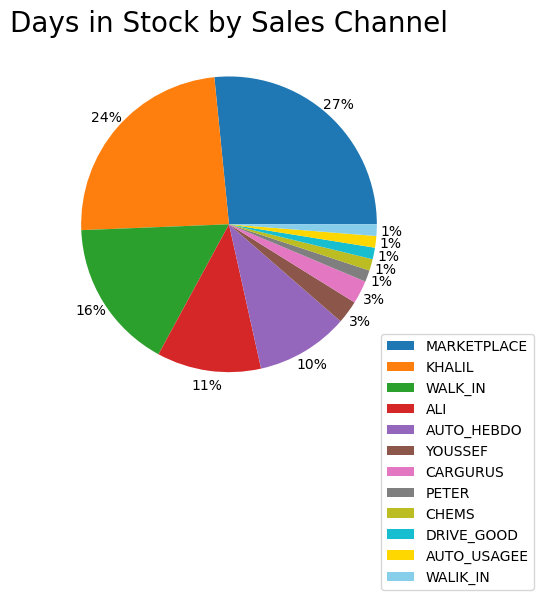

In [481]:
#Choosing colors to prevent pie plot from repeating colors
colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
    'tab:olive', 'tab:cyan', 'gold', 'skyblue']
#Plotting pie chart and showing percentages on outside of chart
pie=plt.pie(data=df2, x='Count', pctdistance=1.1, autopct='%.0f%%', colors=colors)
#Title
plt.title('Days in Stock by Sales Channel', size=20)
#Legend with position away from pie chart
labels = df2['SALE_CHANNEL']
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="center right", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

In [574]:
# Looking more into it, checking how many cars were actually posted on MARKETP, AUTOHEBDO, CARGURUS and DRIVEGOOD
# OUI means posted on that channel and NON means not posted on that channel

FACEBOOK_MKTP=df.groupby('MARKETP.')['VIN'].count()
print(FACEBOOK_MKTP)

AUTOHEBDO_C=df.groupby('AUTO\nHEBDO')['VIN'].count()
print(AUTOHEBDO_C)

CARGURUS_C=df.groupby('CARGURUS')['VIN'].count()
print(CARGURUS_C)

DRIVEGOOD_C=df.groupby('DRIVE\nGOOD')['VIN'].count()
print(DRIVEGOOD_C)

# Almost all cars are posted on facebook marketplace
# Only about half cars are posted on Auto Hebdo
# Only 2 cars were posted on Cargurus. The car dealer have information that if it's not a OUI then it's a NON even if it's left empty
#Only 8 cars were posted on DRIVEGOOD

MARKETP.
NON     3
OUI    76
Name: VIN, dtype: int64
AUTO\nHEBDO
NON    33
OUI    46
Name: VIN, dtype: int64
CARGURUS
NON     2
OUI    10
Name: VIN, dtype: int64
DRIVE\nGOOD
NON     8
OUI    65
Name: VIN, dtype: int64


In [482]:
# Calculate the percentage of cars sold through the 3 top sales channels
24+27+16

67

In [483]:
# Look at car discounts

#Removing $ signs, commas and ".00"
df['PRICE_INITIAL'] = df['PRICE_INITIAL'].str.replace('$', '')
df['PRICE_FINAL'] = df['PRICE_FINAL'].str.replace('$', '')
df['PRICE_INITIAL'] = df['PRICE_INITIAL'].str.replace(',', '')
df['PRICE_FINAL'] = df['PRICE_FINAL'].str.replace(',', '')
df['PRICE_INITIAL'] = df['PRICE_INITIAL'].str.replace('.00', '')
df['PRICE_FINAL'] = df['PRICE_FINAL'].str.replace('.00', '')

# Convert columns to int cause the formula kept identifying the columns as str while we saw that it was float above
df['PRICE_INITIAL'] = df['PRICE_INITIAL'].astype(int)
df['PRICE_FINAL'] = df['PRICE_FINAL'].astype(int)

#Add column for difference between final price and initial price
df['DISCOUNT_VALUE'] = df['PRICE_INITIAL'] - df['PRICE_FINAL']

#Add column for discounted or not
df['DISCOUNT_INDEX'] = np.where(df['DISCOUNT_VALUE'] > 0, 'Y', 'N')

In [488]:
#Making sure it worked
df

,CAR,BRAND,MODEL_NAME,MODEL_YEAR,VIN,PURCH_DATE,PURCH_YEAR,PURCH_MONTH,PURCH_DAY,PRICE_INITIAL,...,SALE_YEAR,SALE_MONTH,SALE_DAY,SALE_CHANNEL,Days_Brand,Days_Model,Days_Year_Make,Days_Initial_Price,DISCOUNT_VALUE,DISCOUNT_INDEX
0,2016 HONDA ODYSSEY,HONDA,ODYSSEY,2016,5FNRL5H2XGB505850,2023-11-28,2023,11,28,15995,...,2024.0,1.0,16.0,AUTO_HEBDO,133,26,123,189,0,N
1,2013 SUZUKI SX4,SUZUKI,SX4,2013,JS2YB5A72D6100079,2024-01-02,2024,1,2,7495,...,2024.0,1.0,18.0,MARKETPLACE,16,16,44,40,345,Y
2,2011 HYUNDAI ACCENT,HYUNDAI,ACCENT,2011,KMHCN4BC6BU549559,2023-10-20,2023,10,20,6495,...,2024.0,1.0,19.0,AUTO_HEBDO,52,41,119,38,495,Y
3,2011 MAZDA CX-7,MAZDA,CX-7,2011,JM3ER4C34B0354560,2023-10-27,2023,10,27,7995,...,2024.0,1.0,20.0,KHALIL,136,64,119,88,0,N
4,2016 JEEP PATRIOT,JEEP,PATRIOT,2016,1C4NJRAB5GD650548,2023-11-13,2023,11,13,13995,...,2024.0,1.0,31.0,AUTO_HEBDO,150,56,123,248,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2015 NISSAN MICRA,NISSAN,MICRA,2015,3N1CK3CPXFL267503,2024-10-31,2024,10,31,6495,...,2024.0,11.0,19.0,MARKETPLACE,177,19,98,38,0,N
75,2013 MAZDA5,MAZDA,5,2013,JM1CW2CL3D0157184,2024-11-13,2024,11,13,6495,...,2024.0,11.0,18.0,MARKETPLACE,136,5,44,38,0,N
76,2018 HYUNDAI SANTA FE,HYUNDAI,SANTA FE,2018,5XYZUDLB0JG516497,2024-10-22,2024,10,22,12995,...,2024.0,11.0,23.0,KHALIL,32,16,122,132,545,Y
77,2016 HYUNDAI ELANTRA,HYUNDAI,ELANTRA GT,2016,KMHD35LH7GU297581,2024-11-22,2024,11,22,9995,...,2024.0,11.0,23.0,ALI,52,1,123,131,995,Y


In [515]:
# Is there a significant difference between the days in stock for discounted vs not discounted cars?

# Null Hypothesis: There isn't a significant difference between days in stock of discounted cars and undiscounted cars.
# Alternative Hypothesis: There is a significant difference between days in stock of discounted cars and undiscounted cars.

# Check if there are negative discounts (price increase)
(df['DISCOUNT_VALUE'].values < 0).any()

# Giving True means that there are negative values
# Replace negative values by 0
df['DISCOUNT_VALUE'] = df['DISCOUNT_VALUE'].apply(lambda x : x if x > 0 else 0)

#Check if it worked
(df['DISCOUNT_VALUE'].values < 0).any()

False

In [540]:
#Calculate count of each category and average days in stock for each category.
#grouped = df.groupby('DISCOUNT_INDEX')['DISCOUNT_VALUE']
#print(grouped)
countbyindex=df.groupby('DISCOUNT_INDEX')['VIN'].count()
print(countbyindex)
meanbyindex=df.groupby('DISCOUNT_INDEX')['DAYS_IN_STOCK'].mean()
print(meanbyindex)
meanbyindex=df.groupby('DISCOUNT_INDEX')['DAYS_IN_STOCK'].std()
print(meanbyindex)

DISCOUNT_INDEX
N    41
Y    38
Name: VIN, dtype: int64
DISCOUNT_INDEX
N     29.048780
Y    163.657895
Name: DAYS_IN_STOCK, dtype: float64
DISCOUNT_INDEX
N     34.037444
Y    152.931053
Name: DAYS_IN_STOCK, dtype: float64


In [550]:
# Since we are comparing 2 means, we need a 2-tailed t-test.
X1 = 29.048780
X2 = 163.657895
S1 = 34.037444
S2 = 152.931053
N1 = 41
N2 = 38
alpha=0.05

# t-value calculation
t_value = (X1 - X2) / math.sqrt((S1**2 / N1) + (S2**2 / N2))

# Degree of freedom
numerator = (S1**2 / N1 + S2**2 / N2) ** 2
denominator = ((S1**2 / N1) ** 2) / (N1 - 1) + ((S2**2 / N2) ** 2) / (N2 - 1)
degreef = numerator / denominator

# Two-tailed p-value
p_value = 2 * stats.t.cdf(-abs(t_value), degreef)

# Results
print(f"t-statistic: {t_value:.4f}")
print(f"Degrees of freedom: {degreef:.4f}")
print(f"p-value: {p_value:.4f}")

#the p-value is 0.0000 which is smaller than alpha so we accept the alternative hypothesis and reject the null hypothesis.

t-statistic: -5.3055
Degrees of freedom: 40.3967
p-value: 0.0000


Axes(0.125,0.11;0.775x0.77)


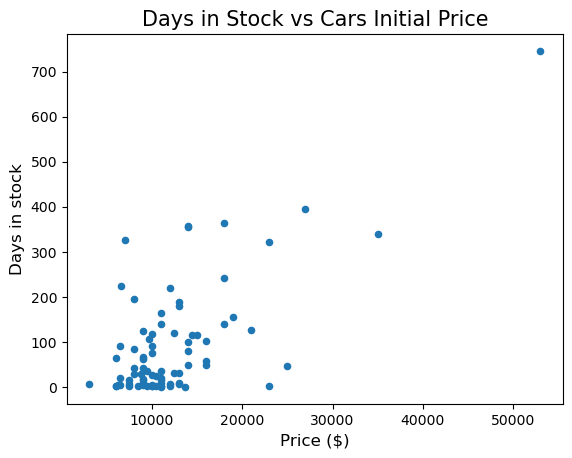

In [560]:
# Scatterplot of days in stock vs the cars initial price
sca=df.plot.scatter(x = 'PRICE_INITIAL', y = 'DAYS_IN_STOCK')
#Title and labels
plt.title('Days in Stock vs Cars Initial Price', size=15)
plt.xlabel('Price ($)', size=12)
plt.ylabel('Days in stock', size=12)
print(sca)

# Cheaper cars seem to be selling faster than more expensive cars

## IV. Conclusion and Recommendation

The results show that on average, a used car spends 94 days in stock at Aubaine Auto. This should be checked against similar small used car dealers to see if this number is low or high. Mitsubishi and Hyundai are the cars that are bought and sold the most with Mitsubishi RVR being the top model. There doesn't seem to be a relationship between the year in which the cars were made and the number of days they stay in stock. June and November were the months with the highest number of sold cars while July and September were the months with the lowest number of sales. However, July can be considered an outlier since, according to the car dealer, the salesman was on vacation that month.
Facebook marketplace, Khalil and walk-ins account for 2/3rds of sales. It is important to note that only a few cars were posted on the cars websites and therefore we cannot say that these websites are not successful in selling the Aubaine Auto cars. We recommend posting all cars in all channels in 2025 to be able to identify which channels are worth investing on in future years. The days spent in stock by discounted cars is significantly higher than the days spent in stock by non discounted cars. This does not necessarily mean causation. We recommend collecting data of when the discount was made to determine if cars stay in stock longer because they are discounted or they are disconted because they stayed in stock too long. Cheaper cars seem to be selling faster than more expensive cars.
